# Data Preprocessing

In [208]:
import pandas as pd

# Data Preprocessing

In [209]:
tourism_rating = pd.read_csv("tourism_rating.csv")
tourism_with_id = pd.read_csv("tourism_with_id.csv")
user = pd.read_csv("user.csv")

In [210]:
df = pd.merge(tourism_rating, tourism_with_id, on='Place_Id', how='inner')
df = pd.merge(df, user, on='User_Id', how='inner')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        10000 non-null  int64  
 1   Place_Id       10000 non-null  int64  
 2   Place_Ratings  10000 non-null  int64  
 3   Place_Name     10000 non-null  object 
 4   Description    10000 non-null  object 
 5   Category       10000 non-null  object 
 6   City           10000 non-null  object 
 7   Price          10000 non-null  int64  
 8   Rating         10000 non-null  float64
 9   Time_Minutes   4628 non-null   float64
 10  Coordinate     10000 non-null  object 
 11  Lat            10000 non-null  float64
 12  Long           10000 non-null  float64
 13  Unnamed: 11    0 non-null      float64
 14  Unnamed: 12    10000 non-null  int64  
 15  Location       10000 non-null  object 
 16  Age            10000 non-null  int64  
dtypes: float64(5), int64(6), object(6)
memory usage: 1.

In [212]:
df = df.dropna(subset=['Rating', 'Price', 'City', 'Age'])
df['Rating'] = df['Rating'].astype(float)
df = df.drop(columns=['Unnamed: 11','Unnamed: 12', 'Time_Minutes'])

In [213]:
df = df.drop(columns=['User_Id', 'Description', 'Location', 'Coordinate', 'Lat', 'Long', 'Age'])

In [214]:
df['Category'] = df['Category'].astype('category')
df['City'] = df['City'].astype('category')

In [215]:
df = df.dropna(subset=['Rating', 'Price', 'City'])

In [216]:
df.to_csv('cleaned_tourism_data.csv', index=False)

print("Data cleaned and saved successfully!")

Data cleaned and saved successfully!


In [217]:
df['Category'] = df['Category'].astype('category')
df['City'] = df['City'].astype('category')

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Place_Id       10000 non-null  int64   
 1   Place_Ratings  10000 non-null  int64   
 2   Place_Name     10000 non-null  object  
 3   Category       10000 non-null  category
 4   City           10000 non-null  category
 5   Price          10000 non-null  int64   
 6   Rating         10000 non-null  float64 
dtypes: category(2), float64(1), int64(3), object(1)
memory usage: 410.7+ KB


In [219]:
unique_categories = df['Category'].unique()
print("Nilai unik dalam kolom 'Category':\n", unique_categories)

# Menunjukkan nilai unik dalam kolom 'City'
unique_cities = df['City'].unique()
print("\nNilai unik dalam kolom 'City':\n", unique_cities)

Nilai unik dalam kolom 'Category':
 ['Budaya', 'Bahari', 'Taman Hiburan', 'Cagar Alam', 'Pusat Perbelanjaan', 'Tempat Ibadah']
Categories (6, object): ['Bahari', 'Budaya', 'Cagar Alam', 'Pusat Perbelanjaan', 'Taman Hiburan', 'Tempat Ibadah']

Nilai unik dalam kolom 'City':
 ['Yogyakarta', 'Semarang', 'Jakarta', 'Bandung', 'Surabaya']
Categories (5, object): ['Bandung', 'Jakarta', 'Semarang', 'Surabaya', 'Yogyakarta']


# Data Cleaned

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

Category
Bahari                4.369694
Budaya                4.523034
Cagar Alam            4.404058
Pusat Perbelanjaan    4.457662
Taman Hiburan         4.401965
Tempat Ibadah         4.715844
Name: Rating, dtype: float64


C:\Users\cicog\AppData\Local\Temp\ipykernel_10748\3540725266.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_avg_rating = df.groupby('Category')['Rating'].mean()
C:\Users\cicog\AppData\Local\Temp\ipykernel_10748\3540725266.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_avg_rating = df.groupby('Category')['Rating'].mean()
C:\Users\cicog\AppData\Local\Temp\ipykernel_10748\3540725266.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=

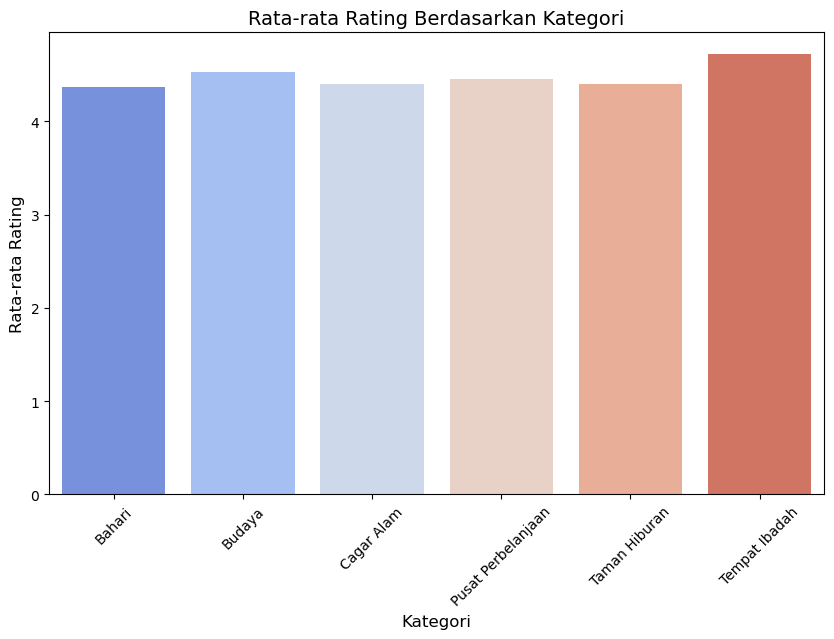

In [221]:
category_avg_rating = df.groupby('Category')['Rating'].mean()
print(category_avg_rating)

# Bar Chart: Rata-rata rating di tiap kategori
category_avg_rating = df.groupby('Category')['Rating'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_avg_rating.index, y=category_avg_rating.values, palette="coolwarm")
plt.title("Rata-rata Rating Berdasarkan Kategori", fontsize=14)
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Rata-rata Rating", fontsize=12)
plt.xticks(rotation=45)
plt.show()




### Analisa Rata-rata Rating Berdasarkan Kategori
- Tempat Ibadah memiliki rating tertinggi (4.7158), menunjukkan bahwa kategori ini sangat dihargai oleh pengunjung.
- Pusat Perbelanjaan (4.4577) dan Budaya (4.5230) juga mendapatkan rating yang cukup tinggi, yang menunjukkan bahwa kategori ini populer di kalangan wisatawan.
- Cagar Alam (4.4041) dan Taman Hiburan (4.4020) memiliki rating yang cukup baik, meskipun sedikit lebih rendah dibandingkan kategori lainnya, yang mungkin menandakan kualitas - pengalaman yang lebih bervariasi.
- Bahari (4.3697) mendapatkan rating terendah di antara kategori lainnya, yang dapat menunjukkan bahwa wisatawan memiliki ekspektasi yang lebih tinggi terhadap destinasi wisata alam dan bahari.

Jumlah Wisata per Kota:
 City
Yogyakarta    2871
Bandung       2842
Jakarta       1920
Semarang      1317
Surabaya      1050
Name: count, dtype: int64


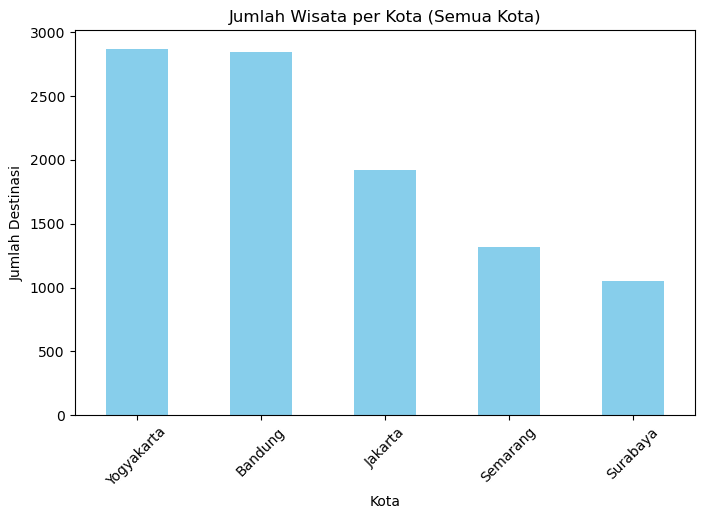

Rata-Rata Rating per Kota:
 City
Bandung       4.426742
Jakarta       4.491302
Semarang      4.369021
Surabaya      4.454190
Yogyakarta    4.466040
Name: Rating, dtype: float64


C:\Users\cicog\AppData\Local\Temp\ipykernel_10748\392157187.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_per_city = df.groupby('City')['Rating'].mean()


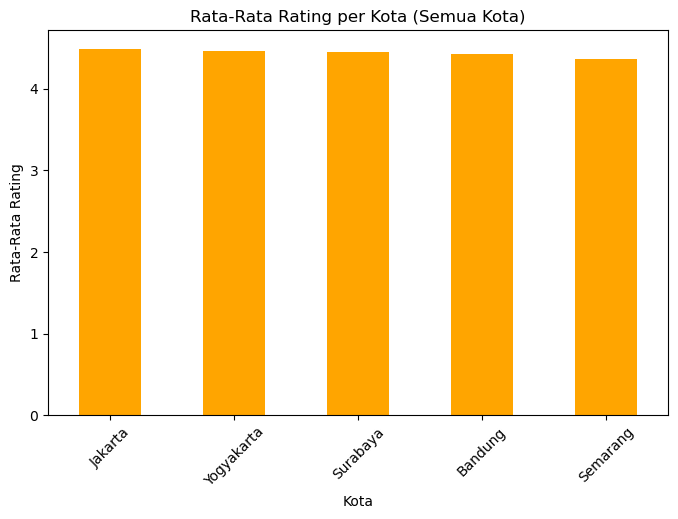

Rata-Rata Harga per Kota:
 City
Bandung       24964.813512
Jakarta       40387.500000
Semarang      16385.725133
Surabaya      11116.190476
Yogyakarta    19334.378265
Name: Price, dtype: float64


C:\Users\cicog\AppData\Local\Temp\ipykernel_10748\392157187.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_per_city = df.groupby('City')['Price'].mean()


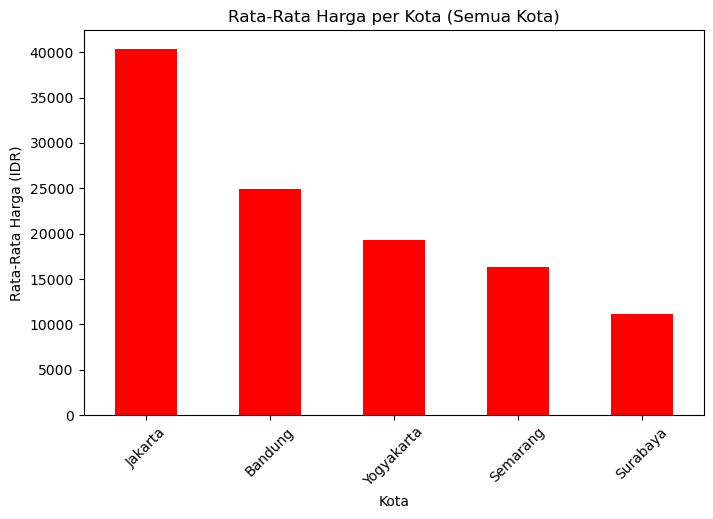

In [222]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Jumlah Wisata per Kota ---
def jumlah_wisata_per_kota(df):
    city_counts = df['City'].value_counts()
    

    print("Jumlah Wisata per Kota:\n", city_counts)

    # Visualisasi output
    plt.figure(figsize=(8, 5))
    city_counts.plot(kind='bar', color='skyblue')
    plt.title('Jumlah Wisata per Kota (Semua Kota)')
    plt.xlabel('Kota')
    plt.ylabel('Jumlah Destinasi')
    plt.xticks(rotation=45)
    plt.show()

# --- Rata-Rata Rating per Kota ---
def rata_rata_rating_per_kota(df):
    avg_rating_per_city = df.groupby('City')['Rating'].mean()
    

    print("Rata-Rata Rating per Kota:\n", avg_rating_per_city)

    # Visualisasi output
    plt.figure(figsize=(8, 5))
    avg_rating_per_city.sort_values(ascending=False).plot(kind='bar', color='orange')
    plt.title('Rata-Rata Rating per Kota (Semua Kota)')
    plt.xlabel('Kota')
    plt.ylabel('Rata-Rata Rating')
    plt.xticks(rotation=45)
    plt.show()

# --- Rata-Rata Harga per Kota ---
def rata_rata_harga_per_kota(df):
    avg_price_per_city = df.groupby('City')['Price'].mean()
    

    print("Rata-Rata Harga per Kota:\n", avg_price_per_city)

    # Visualisasi output
    plt.figure(figsize=(8, 5))
    avg_price_per_city.sort_values(ascending=False).plot(kind='bar', color='red')
    plt.title('Rata-Rata Harga per Kota (Semua Kota)')
    plt.xlabel('Kota')
    plt.ylabel('Rata-Rata Harga (IDR)')
    plt.xticks(rotation=45)
    plt.show()

if 'df' in locals():
    jumlah_wisata_per_kota(df)
    rata_rata_rating_per_kota(df)
    rata_rata_harga_per_kota(df)
else:
    print("Dataframe 'df' tidak ditemukan. Harap load dataframe terlebih dahulu.")


### Deskripsi Kota Berdasarkan Data
- Yogyakarta: Kota wisata dengan jumlah destinasi terbanyak, berfokus pada kekayaan budaya dan alam, dengan harga yang relatif terjangkau namun tetap memberikan pengalaman berkualitas.
- Bandung: Kota dengan jumlah destinasi hampir setara Yogyakarta, terkenal dengan pengalaman wisata berkualitas tinggi, cocok untuk segala segmen wisatawan.
- Jakarta: Ibu kota yang menawarkan pengalaman premium dengan harga wisata tertinggi, meskipun jumlah destinasi lebih sedikit dibandingkan kota lain.
- Semarang: Pilihan menengah dengan harga yang terjangkau dan kualitas pengalaman yang konsisten, meskipun jumlah wisatanya lebih sedikit dibandingkan Yogyakarta atau Bandung.
- Surabaya: Kota dengan wisata yang lebih ekonomis, cocok untuk wisatawan yang mengutamakan efisiensi biaya tanpa mengorbankan kualitas pengalaman.

### Hipotesis Berdasarkan Data
- Yogyakarta sebagai destinasi utama: Banyaknya jumlah wisata di Yogyakarta menunjukkan daya tarik budaya dan alam yang sangat besar, menjadikannya kota favorit untuk wisatawan lokal dan internasional.
- Jakarta sebagai destinasi eksklusif: Harga rata-rata tinggi dan rating tinggi menunjukkan bahwa Jakarta lebih cenderung menarik wisatawan yang mencari pengalaman premium, meskipun dengan jumlah destinasi lebih sedikit.
- Bandung sebagai all-rounder: Dengan jumlah wisata hampir setara dengan Yogyakarta dan rating yang tinggi, Bandung berpotensi menjadi destinasi serbaguna yang menawarkan beragam opsi wisata dengan kualitas pengalaman yang konsisten.
- Surabaya sebagai opsi ramah anggaran: Jumlah destinasi yang lebih sedikit, harga terjangkau, dan rating yang baik menjadikan Surabaya pilihan ideal untuk wisatawan yang mencari pengalaman berkualitas tanpa mengeluarkan biaya besar.

           Price    Rating
Price   1.000000  0.011862
Rating  0.011862  1.000000


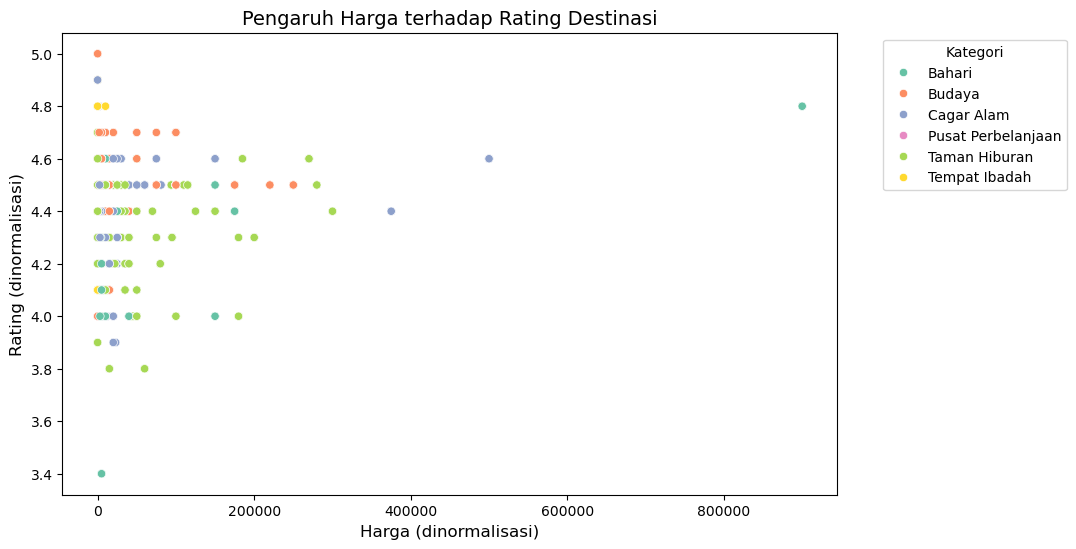

In [223]:
correlation = df[['Price', 'Rating']].corr()
print(correlation)

# Scatter Plot: Pengaruh biaya terhadap popularitas destinasi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', hue='Category', data=df, palette="Set2")
plt.title("Pengaruh Harga terhadap Rating Destinasi", fontsize=14)
plt.xlabel("Harga (dinormalisasi)", fontsize=12)
plt.ylabel("Rating (dinormalisasi)", fontsize=12)
plt.legend(title="Kategori", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Normalisasi

In [224]:
from sklearn.preprocessing import MinMaxScaler



# Normalisasi harga dan rating
scaler = MinMaxScaler()
df[['Price', 'Rating']] = scaler.fit_transform(df[['Price', 'Rating']])

print("Data preprocessing completed successfully!")


Data preprocessing completed successfully!


In [225]:
# Korelasi antara Harga dan Rating
correlation = df[['Price', 'Rating']].corr()
print(correlation)



           Price    Rating
Price   1.000000  0.011862
Rating  0.011862  1.000000


### Analisa Korelasi antara Harga dan Rating
- Korelasi antara Price dan Rating adalah 0.0119, yang menunjukkan hubungan yang sangat lemah.
- Artinya, harga tidak memiliki pengaruh signifikan terhadap rating destinasi wisata.
- Faktor lain seperti kualitas pelayanan atau pengalaman mungkin lebih mempengaruhi rating daripada harga.


In [226]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Rentang jumlah cluster yang akan dicoba
K_range = range(2, 6)  # Misalnya mencoba K = 2 sampai K = 5

best_k = None
best_silhouette_score = -1  # Inisialisasi dengan nilai terendah

# Loop untuk mencoba setiap K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    
    # Hitung Silhouette Score
    sil_score = silhouette_score(features, cluster_labels)
    
    # Jika Silhouette Score lebih tinggi, simpan nilai K dan skor terbaik
    if sil_score > best_silhouette_score:
        best_k = k
        best_silhouette_score = sil_score
    
    print(f'K = {k}, Silhouette Score = {sil_score:.2f}')

# Menampilkan hasil K terbaik
print(f"\nK terbaik berdasarkan Silhouette Score adalah K = {best_k} dengan skor {best_silhouette_score:.2f}")


K = 2, Silhouette Score = 0.43
K = 3, Silhouette Score = 0.45
K = 4, Silhouette Score = 0.54
K = 5, Silhouette Score = 0.47

K terbaik berdasarkan Silhouette Score adalah K = 4 dengan skor 0.54


Calinski-Harabasz Index (CHI): 9848.77
CHI mengevaluasi cluster berdasarkan proporsi variansi antar cluster (inter-cluster variance) terhadap variansi dalam cluster (intra-cluster variance).
Skala: Nilai lebih tinggi menunjukkan clustering yang lebih baik.
9848.77 adalah angka yang sangat tinggi, menunjukkan cluster Anda memiliki variansi antar cluster yang signifikan dan struktur clustering yang kuat.
Kesimpulan untuk CHI: Skor ini mengindikasikan clustering Anda cukup optimal. Biasanya, nilai CHI akan bervariasi tergantung pada jumlah data dan fitur, tetapi angka besar seperti ini menunjukkan hasil yang solid.

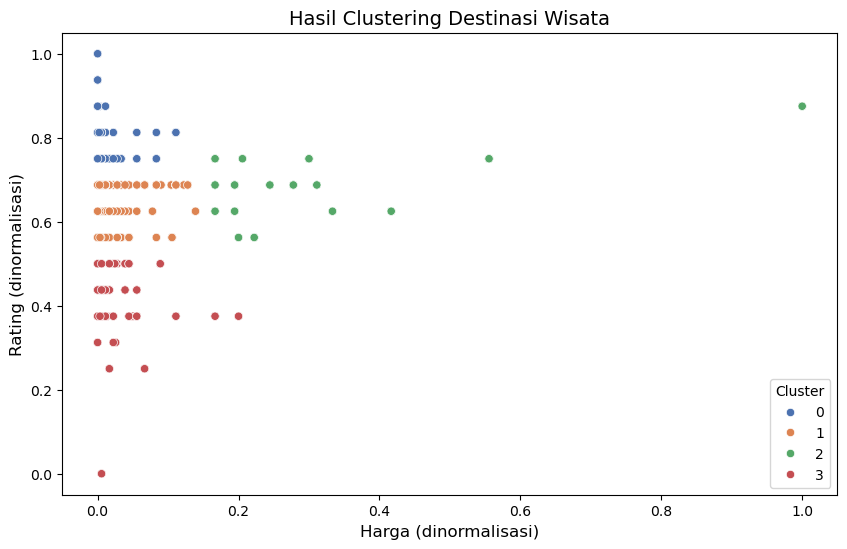

            Price    Rating
Cluster                    
0        0.009615  0.791834
1        0.017000  0.639302
2        0.284808  0.677211
3        0.021087  0.420886


In [227]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fitur untuk clustering
features = df[['Price', 'Rating']]

# Clustering dengan K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', hue='Cluster', data=df, palette="deep")
plt.title("Hasil Clustering Destinasi Wisata", fontsize=14)
plt.xlabel("Harga (dinormalisasi)", fontsize=12)
plt.ylabel("Rating (dinormalisasi)", fontsize=12)
plt.legend(title="Cluster")
plt.show()

cluster_summary = df.groupby('Cluster')[['Price', 'Rating']].mean()
print(cluster_summary)



In [228]:
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(features, df['Cluster'])
print(f"Calinski-Harabasz Index: {ch_index:.2f}")


Calinski-Harabasz Index: 9848.77


In [229]:
# Statistik deskriptif untuk Price dan Rating di tiap Cluster
cluster_summary = df.groupby('Cluster')[['Price', 'Rating']].describe()
cluster_summary



Price                                                              \
          count      mean       std       min       25%       50%       75%   
Cluster                                                                       
0        2870.0  0.009615  0.019683  0.000000  0.000000  0.000000  0.007778   
1        5301.0  0.017000  0.025343  0.000000  0.000000  0.008333  0.022222   
2         407.0  0.284808  0.182129  0.166667  0.194444  0.222222  0.300000   
3        1422.0  0.021087  0.037041  0.000000  0.003333  0.005556  0.022222   

                   Rating                                                     \
              max   count      mean       std     min    25%     50%     75%   
Cluster                                                                        
0        0.111111  2870.0  0.791834  0.061867  0.7500  0.750  0.7500  0.8125   
1        0.138889  5301.0  0.639302  0.046211  0.5625  0.625  0.6250  0.6875   
2        1.000000   407.0  0.677211  0.077108  0.5625  0.625  0.6875  0.7500   
3        0.200000  1422.0  0.420886  0.084077  0.0000  0.375  0.4375  0.5000   

                 
            max  
Cluster          
0        1.0000  
1        0.6875  
2        0.8750  
3        0.5000

C:\Users\cicog\AppData\Local\Temp\ipykernel_10748\1816403728.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_count_per_cluster = df.groupby(['Cluster', 'City']).size().unstack(fill_value=0)


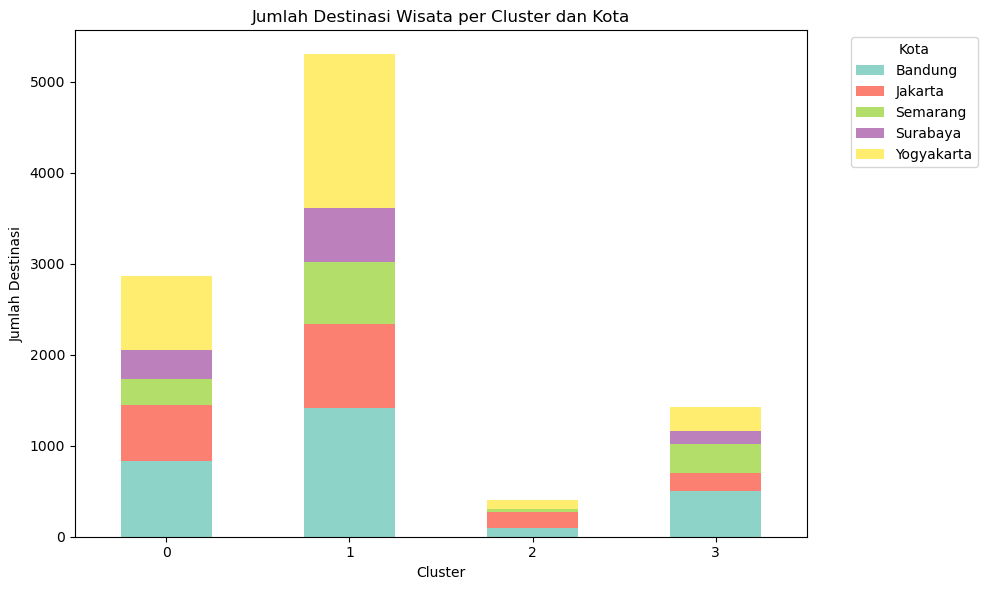

In [230]:
fig, ax = plt.subplots(figsize=(10, 6))

city_count_per_cluster = df.groupby(['Cluster', 'City']).size().unstack(fill_value=0)

city_count_per_cluster.plot(kind='bar', stacked=True, ax=ax, colormap='Set3')
ax.set_title("Jumlah Destinasi Wisata per Cluster dan Kota")
ax.set_xlabel("Cluster")
ax.set_ylabel("Jumlah Destinasi")
ax.legend(title="Kota", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [231]:
city_count_per_cluster = df.groupby(['Cluster', 'City']).size().reset_index(name='Count')

city_count_sorted = city_count_per_cluster.sort_values(by=['Cluster', 'Count'], ascending=[True, False])


print("### Daftar Kota diurutkan Berdasarkan Cluster dan Jumlah Dominasi ###\n")
for cluster in city_count_sorted['Cluster'].unique():
    print(f"Cluster {cluster}:")
    cluster_data = city_count_sorted[city_count_sorted['Cluster'] == cluster]
    for _, row in cluster_data.iterrows():
        print(f"- {row['City']}: {row['Count']} destinasi")
    print("")  


### Daftar Kota diurutkan Berdasarkan Cluster dan Jumlah Dominasi ###

Cluster 0:
- Bandung: 829 destinasi
- Yogyakarta: 821 destinasi
- Jakarta: 622 destinasi
- Surabaya: 319 destinasi
- Semarang: 279 destinasi

Cluster 1:
- Yogyakarta: 1691 destinasi
- Bandung: 1413 destinasi
- Jakarta: 924 destinasi
- Semarang: 679 destinasi
- Surabaya: 594 destinasi

Cluster 2:
- Jakarta: 174 destinasi
- Bandung: 98 destinasi
- Yogyakarta: 97 destinasi
- Semarang: 38 destinasi
- Surabaya: 0 destinasi

Cluster 3:
- Bandung: 502 destinasi
- Semarang: 321 destinasi
- Yogyakarta: 262 destinasi
- Jakarta: 200 destinasi
- Surabaya: 137 destinasi



C:\Users\cicog\AppData\Local\Temp\ipykernel_10748\1284300227.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_count_per_cluster = df.groupby(['Cluster', 'City']).size().reset_index(name='Count')


## Analisis Cluster Berdasarkan Price, Rating, dan Dominasi Kota
### Cluster 0: Wisata Murah dan Berkualitas
- Harga: Sangat rendah, banyak destinasi gratis.
- Rating: Tinggi, kualitas konsisten.
- Kota Dominan: Bandung (829 destinasi), Yogyakarta (821 destinasi), Jakarta (622 destinasi).
- Rekomendasi: Pilihan ideal bagi wisatawan hemat, terutama di Bandung dan Yogyakarta.
### Cluster 1: Harga dan Kualitas Bervariasi
- Harga: Sedikit lebih tinggi, tetap banyak destinasi gratis.
- Rating: Cukup baik, tetapi kualitas bervariasi.
- Kota Dominan: Yogyakarta (1953 destinasi), Bandung (1915 destinasi), Jakarta (1124 destinasi).
- Rekomendasi: Cocok untuk wisatawan mencari variasi harga dan destinasi, dengan fokus di Yogyakarta dan Bandung.
### Cluster 2: Wisata Premium
- Harga: Tinggi dengan variasi besar.
- Rating: Baik dan konsisten.
- Kota Dominan: Jakarta (174 destinasi), Bandung (98 destinasi), Yogyakarta (97 destinasi).
- Rekomendasi: Sesuai untuk wisatawan premium, dengan Jakarta sebagai pusat utama.
### Cluster 3: Wisata Sangat Murah dengan Kualitas Rendah
- Harga: Rendah (rata-rata 0.021, hampir setara dengan Cluster 1).
- Rating: Rendah (rata-rata 0.42, terendah di antara cluster).
- Kota Dominan: Bandung (502 destinasi),Semarang (321 destinasi),Yogyakarta (262 destinasi)
- Rekomendasi:Cocok untuk wisatawan yang hanya mencari destinasi murah tanpa terlalu memprioritaskan kualitas.Fokus pada Bandung dan Semarang.
## Kesimpulan:
- Bandung dan Yogyakarta tetap menjadi destinasi unggulan di kategori wisata murah (Cluster 0 dan Cluster 1).
- Jakarta memimpin di kategori wisata premium (Cluster 2), dengan pengalaman eksklusif dan harga tinggi.
- Cluster 3 menunjukkan adanya destinasi murah dengan kualitas rendah, mendominasi kota-kota seperti Bandung dan Semarang.
- Segmentasi yang lebih detail dengan 4 cluster memberikan gambaran yang lebih spesifik tentang target wisatawan:
- Wisatawan hemat (Cluster 0 dan 1).
- Wisatawan premium (Cluster 2).
- Wisatawan yang mencari destinasi murah tanpa fokus pada kualitas (Cluster 3).